# <center>AFRICAN MASTER’S FOR MACHINE INTELLIGENCE </center>

## <center>AMMI AIMS-SENEGAL</center>


___
<p align= 'center'> <strong> FONDATION OF DEEP LEARNING</strong></p>


___


# Import Librairies

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

1. # Generate a synthetic data for a regression problem which contains 1000 rows and 4 features.

In [ ]:
X, y = make_regression(n_samples=1000, n_features=4, noise=20)

In [ ]:
data_features = pd.DataFrame(X, columns=["X1", "X2", "X3", "X3"])
data_target = pd.DataFrame(y, columns=["Y"])
#dataset = pd.concat([data_features, data_target], axis=1)
print(data_features.head())
print(data_target.head())

         X1        X2        X3        X3
0 -1.776596 -0.150979  0.459614 -0.279249
1  1.260775 -0.549362 -0.243922 -0.814439
2  1.122814 -0.053503  1.502239  0.835137
3  0.125238 -0.748059 -0.699886 -1.639110
4  1.545057  0.186107 -1.405246 -0.031324
            Y
0  -71.366514
1  -13.714668
2  212.558804
3 -155.517408
4   -4.931715


# Scale dataset

In [ ]:
def scale(df):
  df_scaled= (df-df.mean())/df.std()
  return df_scaled
data_target = scale(data_target)
data_features = scale(data_features)
data_target.head(), data_features.head()

(          Y
 0 -0.615459
 1 -0.094341
 2  1.950959
 3 -1.376104
 4 -0.014951,          X1        X2        X3        X3
 0 -1.750017 -0.128218  0.493037 -0.285299
 1  1.266180 -0.530926 -0.203585 -0.821490
 2  1.129181 -0.029683  1.525416  0.831169
 3  0.138558 -0.731781 -0.655068 -1.647702
 4  1.548480  0.212529 -1.353497 -0.036911)

2. # Create a function that allows you to split the dataset into train and valida-
tion sets.

In [ ]:
def split_data(df, train_percent= 0.8):
  np.random.seed(2)
  perm = np.random.permutation(df.index)

  n= len(df)
  train_index = int(train_percent * n)

  train = df.iloc[perm[:train_index]]
  test = df.iloc[perm[train_index:]]

  
  return train.values, test.values

In [ ]:
x_train, x_test= split_data(data_features) 
y_train, y_test = split_data(data_target)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((800, 4), (800, 1), (200, 4), (200, 1))

3. # Create a class called NeuralNetworkRegressor of one hidden layer that you will use to train your model.

4. # Use Mini-batch gradient descent for updating the weights and apply early stopping to select the best model.
5. # Compute the validation accuracy.
6. # Plot the training and validation loss.

In [ ]:
class Neural_Network:
  def __init__(self, x_test,y_test, minibatch_size=32, num_epochs= 1000, lr= 0.0001, threshold= 0.5,):
    
    self.lr=lr
    self.epochs = num_epochs
    self.threshold = threshold
    self.minibatch_size = minibatch_size
    self.x_test = x_test
    self.y_test = y_test
    self.cost_train = []
    self.cost_test = []
    self.size=(4,16,1) 
  # definie sigmoid function
  def sigmoid(self,z):
    return 1/(1+np.exp(-z))

  # derivate function sigmoid
  def dsigmoid(self,z):
    return self.sigmoid(z)*(1- self.sigmoid(z))

  # Cross Entropy loss
  def cross_entropy(self,y,y_pred):
    return -np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))/len(y)

  # Gradient of the Cross Entropy loss
  def gradient(self, y,y_pred):
    return -(np.sum((y-y_pred)))/len(y)

  # initialize the params
  def weight_initialization(self):
    self.size=(4,16,1) 
        
    params = {
          'w':0.01*np.random.randn(self.size[1],self.size[0]),
          'b': np.random.randn(self.size[1],self.size[2]),
          'w1':0.01*np.random.randn(self.size[1],self.size[0]),
          'b1': np.random.randn(self.size[1],self.size[2]),
          'w2':0.01*np.random.randn(self.size[2],self.size[1]),
          'w3':0.01*np.random.randn(self.size[2],self.size[1]),
          'b2':np.random.randn(1,1) 
        }
        
    self.params=params
    return params  
  
  # forword pass
  def forward_pass(self, x):
    params= self.params
    w= params['w']
    b= params['b']

    w1= params['w1']
    b1= params['b1']

    w2= params['w2']
    w3= params['w3']
    b2= params['b2']
    
    z= w@x.T + b
    sig = self.sigmoid(z)

    z1 = w1@x.T + b1
    sig1 = self.sigmoid(z1)
    #print((w2@sig).shape, w2.shape, sig1.shape, w3.shape, b2)
    z_out= w2@sig + w3@sig1 + b2
    y_pred = self.sigmoid(x)
    return z, sig, z1, sig1, z_out, y_pred
  
  # backward pass
  def backward_pass(self, x, y): 
    params= self.params
    w= params['w']
    b= params['b']

    w1= params['w1']
    b1= params['b1']

    w2= params['w2']
    w3= params['w3']
    b2= params['b2']

    n = len(y) 
    z, sig, z1, sig1, z_out, y_pred = self.forward_pass(x)

    dy_pred = self.gradient(y, y_pred)
    dw = (dy_pred*self.dsigmoid(z_out)*(w2@self.dsigmoid(z)))@x
    #print((dy_pred*self.dsigmoid(z_out)).shape, w2.shape, ().shape)
    db = dy_pred*self.dsigmoid(z_out)*(w2@self.dsigmoid(z))
    
    dw1 = (dy_pred*self.dsigmoid(z_out)*(w3@self.dsigmoid(z1)))@x
    db1 = dy_pred*self.dsigmoid(z_out)*(w3@self.dsigmoid(z1))
    #print((dy_pred*self.dsigmoid(z_out)).shape, self.sigmoid(z).shape)
    dw2 = dy_pred*self.dsigmoid(z_out)@self.sigmoid(z).T
    dw3 = dy_pred*self.dsigmoid(z_out)@self.sigmoid(z1).T
    db2 = dy_pred*self.dsigmoid(z_out)

    return dw, db, dw1, db1, dw2, dw3, db2

  def fit(self, x, y):
    params= self.weight_initialization()
    
    for i in range(self.epochs):
      j=np.random.choice(x.shape[0], size=self.minibatch_size, replace = False)
      loss_train=[]
      loss_test = []
      w= self.params['w']
      b= self.params['b']

      w1= self.params['w1']
      b1= self.params['b1']

      w2= self.params['w2']
      w3= self.params['w3']
      b2= self.params['b2']
      for j in range(0,x.shape[0],self.minibatch_size):
        x_mb = x[j:j+self.minibatch_size,:]
        y_mb = y[j:j+self.minibatch_size]
        
        
        # Get the Train Loss: backward pass and update parameters 
        dw, db, dw1, db1, dw2, dw3, db2 = self.backward_pass(x_mb,y_mb)
        # print(self.w.shape, dw.shape)
        #print(w.shape, dw.shape)
        w =w- self.lr*dw
        b = b-self.lr*db
        w1 =w1-self.lr*dw1
        b1 =b1-self.lr*db1
        #print(w2.shape, dw2.shape)
        w2 =self.lr*dw2
        w3 =w3-self.lr*dw3
        b2 =b2-self.lr*db2
        
        z, sig, z1, sig1, z_out, y_pred = self.forward_pass(x_mb) 
        loss_train.append(self.cross_entropy(y_mb,y_pred))

        #print(self.cross_entropy(y_mb,y_pred))

        # z, sig, z1, sig1, z_out, y_pred_test = self.forward_pass(self.x_test) 
        # loss_test.append(self.cross_entropy(self.y_test,y_pred_test))
        self.params = {
            'w':w,
            'b': b,
            'w1':w1,
            'b1':b1,
            'w2':w2,
            'w3':w3,
            'b2':b2 
        }
        
      
        
      self.cost_train.append(np.mean(loss_train))
      self.cost_test.append(np.mean(loss_test))
      
      #
      #self.cost_test.append(loss_test)
      print(f'cost for {i} epoch : {self.cost_train}')
  
  def get_class(self,x):
  # Foward pass on x
    _,_,_,proba= self.forward_pass(x)# Get probability of x
    result= np.where(proba>self.threshold,1,0) # Convert proba to 0 or 1. hint: list comprehension
    return np.array(result), proba

  def accuracy(y, y_pred):
    X= np.where(y==y_pred,1,0)
    acc=np.count_nonzero(X==1)/len(y)
    
    return acc

  def plot(self):
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(np.arange(len(self.cost_train)), self.cost_train, 'r', linewidth = "2", label= 'Train Loss')
    plt.plot(np.arange(len(self.cost_test)), self.cost_test, 'b', linewidth = "2", label= 'Validation Loss')
    plt.legend()
    plt.show()

In [ ]:
neural_network = Neural_Network( x_test,y_test)

In [ ]:
neural_network.fit(x_train, y_train) 

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
y_pred, y_proba= neural_network.get_class(x_test)

In [ ]:
y_test =np.where(y_test>0.5,1,0) 

In [ ]:
neural_network.accuracy(y_test, y_pred)

NameError: ignored

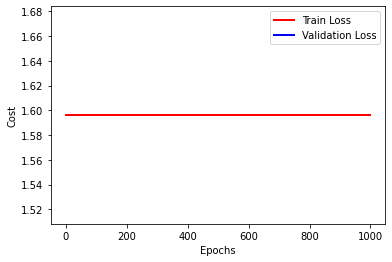

In [ ]:
neural_network.plot()